# **5. Sistem Persamaan Diferensial dan Bidang Fasa**

> Gabriel Jonathan (gabejonathan29@gmail.com)

Pada praktikum 5, akan dibahas mengenai penyelesaian dari sistem persamaan diferensial serta bidang fasa dari SPD tersebut. Pembahasan hanya terfokus pada SPD linier homogen.



**Apa itu Sistem Persamaan Diferensial Linier Homogen?**

Sistem Persamaan Diferensial Linier Homogen dapat dituliskan dalam bentuk:
\begin{align*}
f_1'(x) &= a_{11}f_1(x) + a_{12}f_2(x) + ... a_{1n}f_n(x)\\
f_2'(x) &= a_{21}f_1(x) + a_{22}f_2(x) + ... a_{2n}f_n(x)\\
&\vdots \\
f_n'(x) &= a_{n1}f_1(x) + a_{n2}f_2(x) + ... a_{nn}f_n(x)\\
\end{align*}

yang dapat dituliskan sebagai:
\begin{equation*}
\textbf{F}'=A\textbf{F}
\end{equation*}
dimana $\textbf{F}=\begin{bmatrix}f_1 \\ f_2 \\\vdots \\f_n\end{bmatrix}$ dan  $A=\begin{bmatrix} a_{11} & a_{12} & ... & a_{n1}\\ \vdots &   \ddots      &      & \vdots \\a_{n1} &   a_{n2}     &    ...   & a_{nn}\end{bmatrix}$



> **Contoh 1:** 
\begin{align*}
\dfrac{dx}{dt} &= 2x-3y\\
\dfrac{dy}{dt} &= 22x +71y
\end{align*}
merupakan sistem persamaan diferensial linear yang homogen.

> **Contoh 2:** 
\begin{align*}
\dfrac{dx}{dt} &= 2x-3y\\
\dfrac{dy}{dt} &= 22x +71y + \sin(t)
\end{align*}
merupakan sistem persamaan diferensial linear yang **tidak homogen**.

> **Contoh 3:** 
\begin{align*}
\dfrac{dx}{dt} &= 2x-3xy\\
\dfrac{dy}{dt} &= 22x +71y
\end{align*}
merupakan sistem persamaan diferensial **nonlinear** yang homogen.

> **Contoh 4:** 
\begin{align*}
\dfrac{dx}{dt} &= 2x-3xy\\
\dfrac{dy}{dt} &= 22x +71y +\sin(t)
\end{align*}
merupakan sistem persamaan diferensial **nonlinear** dan **tidak homogen.**

## **5.1 Metode Nilai Eigen**

Pandang suatu masalah nilai awal $\dfrac{d\vec{x}}{dt}=A\vec{x}, \vec{x}(0)=\vec{x}_0$. Asumsikan bahwa matriks $A$ dapat didiagonalkan. 

Jika $\lambda_1, \lambda_2, ..., \lambda_n$ dan $v_1, v_2, ..., v_n$ merupakan pasangan eigen dari matriks $A$, maka solusi umum dari MNA tersebut adalah 
\begin{equation*}
\vec{x}(t) = C_1 e^{\lambda_1 t}\vec{v}_1 + C_2 e^{\lambda_2 t}\vec{v}_2 + ... + C_n e^{\lambda_n t}\vec{v}_n
\end{equation*}


Nilai - nilai konstanta $C_1, .., C_n$ yang tidak diketahui dapat diperoleh dengan mengevaluasi kondisi awal di $t=0$. 

Pada praktikum 5 ini, metode nilai eigen yang diberikan hanya terbatas untuk **kasus nilai eigen yang real dan berbeda.**

> **Contoh 1:**
Pandang SPD linier homogen $x'=Ax$ dengan $A=\begin{bmatrix}1 & 4 \\ 3 & 1\end{bmatrix}$ dan $x(0)=\begin{bmatrix}1 \\0 \end{bmatrix}$.

Berikut adalah penyelesaian SPD tersebut dengan menggunakan metode nilai eigen.

In [ ]:
import numpy as np
import numpy.linalg as linalg
from sympy.core.numbers import Float
from sympy import *
import sympy
import matplotlib.pyplot as plt
sympy.init_printing() 
x, y = symbols("x y", cls=Function, Function=True) # Nyatakan x dan y sebagai handle fungsi
t, C1, C2 = symbols("t C1 C2") # Nyatakan t, C1, C2 sebagai simbol.

A = np.array([[1, 4], [3, 1]])
# Menentukan nilai dan vektor eigen dari A
eigval_A, eigvec_A = linalg.eig(A)
lambda_1 = eigval_A[0]
lambda_2 = eigval_A[1]
print("Nilai eigen A : ({:.10f}, {:.10f})".format(lambda_1, lambda_2))
print("Vektor eigen A : \n", eigvec_A)

Nilai eigen A : (4.4641016151, -2.4641016151)
Vektor eigen A : 
 [[ 0.75592895 -0.75592895]
 [ 0.65465367  0.65465367]]


In [ ]:
# Simpan vektor eigen dalam v_1, v_2
v_1 = eigvec_A[:, 0].reshape(2, 1)
v_2 = eigvec_A[:, 1].reshape(2, 1)

# Kondisi awal 
x0 = 1
y0 = 0

# Solusi umum
v_1 = [Float(v) for v in v_1]
v_2 = [Float(v) for v in v_2]
# Peroleh solusi umum x(t) dan y(t) melalui perkalian matriks sebagai berikut,
sys_x = Eq(x(t), C1*exp(lambda_1*t)*v_1[0] + C2*exp(lambda_2*t)*v_2[0])
sys_y = Eq(y(t), C1*exp(lambda_1*t)*v_1[1] + C2*exp(lambda_2*t)*v_2[1])
soln = np.array([sys_x, sys_y])
print('Solusi Umum | Metode nilai eigen :')
sys_x, sys_y

Solusi Umum | Metode nilai eigen :


In [ ]:
# Substitusi kondisi awal untuk memperoleh C1, C2
constants = solve((soln[0].subs(t, 0).subs(x(0), 1),
                soln[1].subs(t, 0).subs(y(0), 0)), {C1, C2})
# Solusi khusus x
sol_x = soln[0].rhs.subs(constants)
# Solusi khusus y
sol_y = soln[1].rhs.subs(constants)
print('Solusi Khusus (x(t), y(t)) | Metode nilai eigen : ')
sol_x, sol_y

Solusi Khusus (x(t), y(t)) | Metode nilai eigen : 


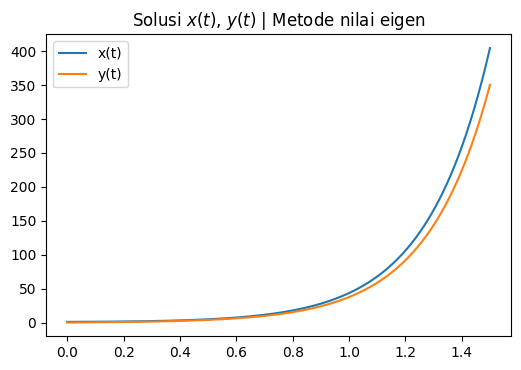

In [ ]:
# Plot solusi
plt.rcParams['figure.dpi'] = 100
func_x = lambdify(t, sol_x)
func_y = lambdify(t, sol_y)

t_s = np.linspace(0, 1.5, 1000)
plt.plot(t_s, func_x(t_s))
plt.plot(t_s, func_y(t_s))
plt.legend(['x(t)', 'y(t)'])
plt.title('Solusi $x(t)$, $y(t)$ | Metode nilai eigen')
plt.show()

Berikut adalah penyelesaian dari SPD yang sama dengan menggunakan `dsolve`. 

Solusi Umum | Metode dsolve :


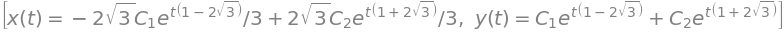

In [ ]:
import numpy as np
from sympy import solve, Eq, Derivative
from sympy import *
import sympy
import matplotlib.pyplot as plt
sympy.init_printing() 
x, y = symbols("x y", cls=Function, Function=True) # Nyatakan x dan y sebagai handle fungsi
t, C1, C2 = symbols("t C1 C2") # Nyatakan t, C1, C2 sebagai simbol.

eq1 = Eq(Derivative(x(t), t), x(t) + 4*y(t))
eq2 = Eq(Derivative(y(t), t), 3*x(t) + y(t))
soln = dsolve((eq1, eq2)) # output dari soln berupa suatu list.
print('Solusi Umum | Metode dsolve :')
soln


Perhatikan bahwa hasil yang diperoleh sedikit berbeda dari hasil yang diperoleh melalui metode nilai eigen. 

> **Why?**\
Perlu diingat bahwa package `linalg` dari `numpy` tidak memberikan nilai dan vektor eigen yang eksak dari suatu matriks, melainkan **hampiran numerik** nya saja. 

In [ ]:
# Substitusi kondisi awal untuk memperoleh C1, C2
constants = solve((soln[0].subs(t, 0).subs(x(0), 1),
                soln[1].subs(t, 0).subs(y(0), 0)), {C1, C2})
# Solusi khusus x
sol_x = soln[0].rhs.subs(constants)
# Solusi khusus y
sol_y = soln[1].rhs.subs(constants)
print('Solusi Khusus (x(t), y(t)) | Metode dsolve : ')
sol_x, sol_y

Solusi Khusus (x(t), y(t)) | Metode dsolve : 


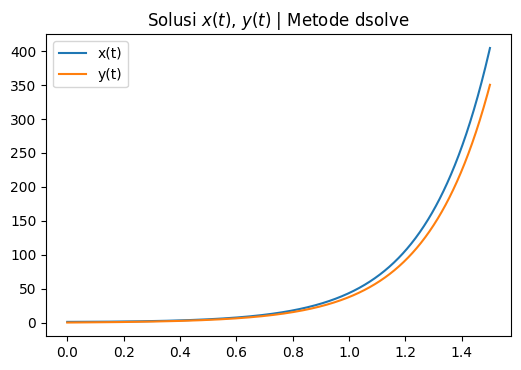

In [ ]:
# Plot solusi
plt.rcParams['figure.dpi'] = 100
func_x = lambdify(t, sol_x)
func_y = lambdify(t, sol_y)

t_s = np.linspace(0, 1.5, 1000)
plt.plot(t_s, func_x(t_s))
plt.plot(t_s, func_y(t_s))
plt.legend(['x(t)', 'y(t)'])
plt.title('Solusi $x(t)$, $y(t)$ | Metode dsolve')
plt.show()

## **5.2 Bidang Fasa**

**Bidang Fasa** (atau *phase portrait* atau potret fasa) adalah representasi geometri dari trajektori solusi (lintasan solusi) dari suatu sistem dinamik. 

Dengan mengetahui bidang fasa dari suatu sistem diferensial, maka dinamika dari suatu solusi dengan nilai awal tertentu dapat diketahui. 

*Catatan* : Untuk sistem persamaan diferensial, sumbu - sumbu dari bidang fasa adalah *state-variable* nya e.g $x(t)$ vs $y(t)$, bukan waktu $(t)$. 

Untuk menggambar bidang fasa pada Python, kali ini kita akan memanfaatkan perintah `quiver` dari `matplotlib`. Perintah ini menghasilkan plot berisikan panah - panah.

`quiver(x, y, U, V)` menerima 4 input, yaitu

1. `x` dan `y` : vektor koordinat $x$ dan $y$ dari lokasi panah
2. `U` dan `V` : vektor arah dari panah


Akan ditampilkan bidang fasa dari sistem pada contoh diatas.


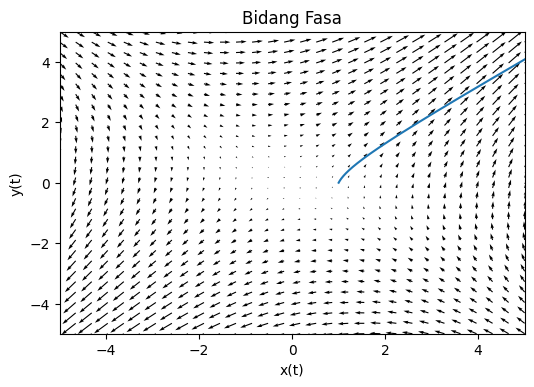

In [ ]:
func_x = lambdify(t, sol_x)
func_y = lambdify(t, sol_y)

t_s = np.linspace(0, 1.5, 1000)

# membuat vektor koordinat x dan y, menandakan lokasi panah
x_s = np.linspace(-5, 5, 30)
y_s = np.linspace(-5, 5, 30)
# gunakan np.meshgrid untuk menghasilkan matriks koordinat dari vektor koordinat x_s dan y_s
x_s, y_s = np.meshgrid(x_s, y_s)

plt.quiver(x_s, y_s, x_s+4*y_s, 3*x_s+y_s)
plt.plot(func_x(t_s), func_y(t_s)) # plot salah satu lintasan solusi 
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.title('Bidang Fasa')
plt.show()